<a href="https://colab.research.google.com/github/aditya-chavda/TSF-Internship-Tasks/blob/master/Task5_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: To Explore Business Analytics

Description: Supposing that we are the business owner of a retail firm, we are interested in seeing the company performance and the weak areas where more work is needed for making profit. The task is to derive business problems looking at the provided USA Superstore sample dataset.

## Author: Aditya Chavda
####Date created: 28th September, 2020
This notebook is created to complete the above stated task given as part of data science internship under The Sparks Foundation.

####Importing Libraries and the Data


In [3]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Reading from the provided dataset
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


####Exploring and Processing the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#Checking for any null entry
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null entry found!

In [8]:
#Checking for any duplicate entry
df.duplicated().sum()

17

17 duplicate entries found!

In [9]:
#Dropping those duplicates
df.drop_duplicates(inplace=True)
df.shape

(9977, 13)

Since the entire dataset is from a single country, i.e. USA, we can drop the 'Country' column.

Also, postal codes represent city, so there is no point of having both the columns. Dropping 'Postal Code' column as well.

In [10]:
#Dropping unnecessary columns
df.drop(['Country', 'Postal Code'], axis = 1, inplace=True)
df.shape

(9977, 11)

In [11]:
#Unique column values
for col in df.columns:
    if df[col].dtype=='object':
        print("Total",col,":",df[col].nunique())

Total Ship Mode : 4
Total Segment : 3
Total City : 531
Total State : 49
Total Region : 4
Total Category : 3
Total Sub-Category : 17


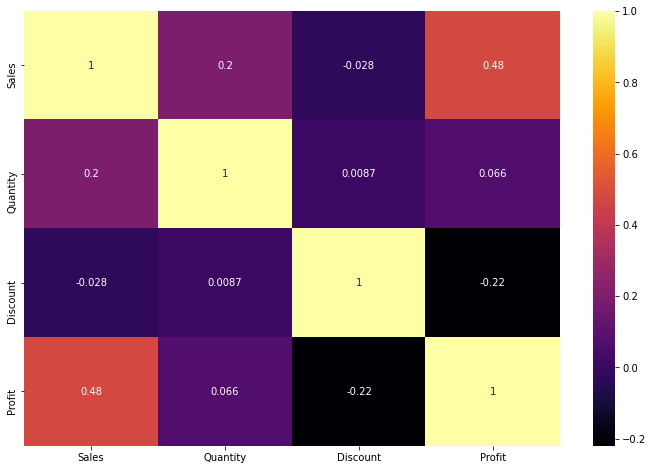

In [12]:
#Checking any correlations among the columns
plt.subplots(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')

No strong correlation is found!

####Data Visualization

####Region wise Sales & Profit of each category

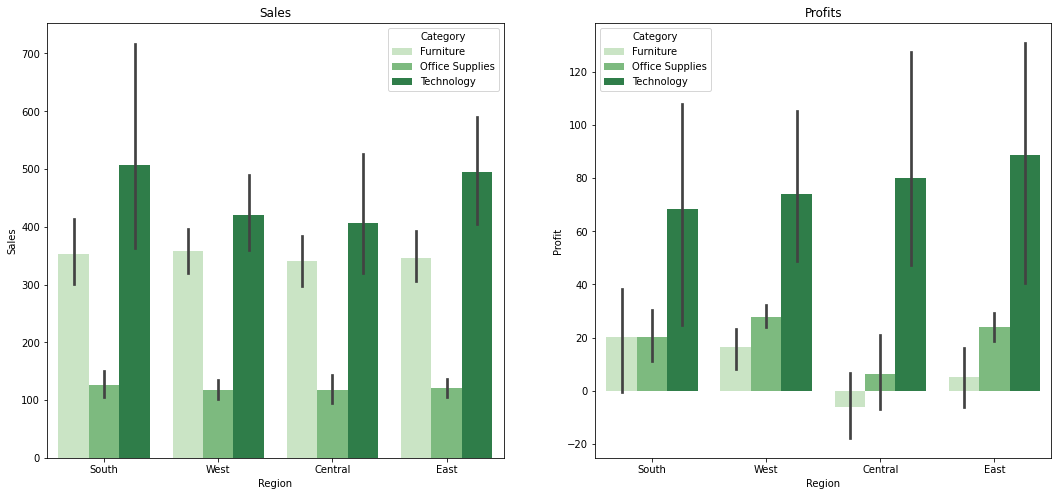

In [13]:
_, axes = plt.subplots(1,2, figsize = (18, 8))
sns.barplot(x = "Region", y = "Sales", hue = "Category", data=df, palette = "Greens", ax = axes[0])
axes[0].set_title("Sales")

sns.barplot(x = "Region", y = "Profit", hue = "Category", data=df, palette = "Greens", ax = axes[1])
axes[1].set_title("Profits")

plt.show()

Technology has the highest sales and profits in all the regions followed by Furniture and Office Supplies.

Furniture is suffering loss in Central region despite having fair amount of sales.

####Category wise Sales & Profit

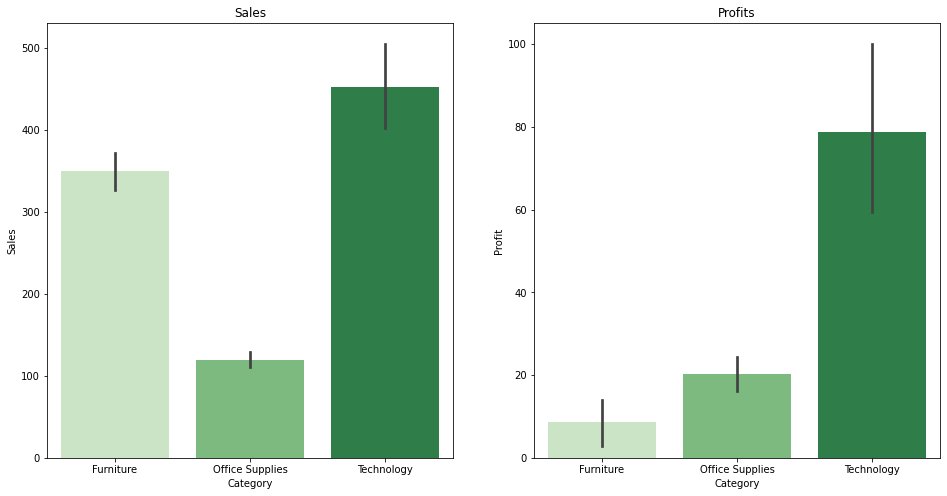

In [14]:
_, axes = plt.subplots(1,2, figsize = (16, 8))
sns.barplot(x = "Category", y = "Sales", data = df, palette = "Greens", ax = axes[0])
axes[0].set_title("Sales")

sns.barplot(x = "Category", y = "Profit", data = df, palette = "Greens", ax = axes[1])
axes[1].set_title("Profits")

plt.show()

Technology category has the highest sales and profit.

####Sub Category wise Profits & Sales 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


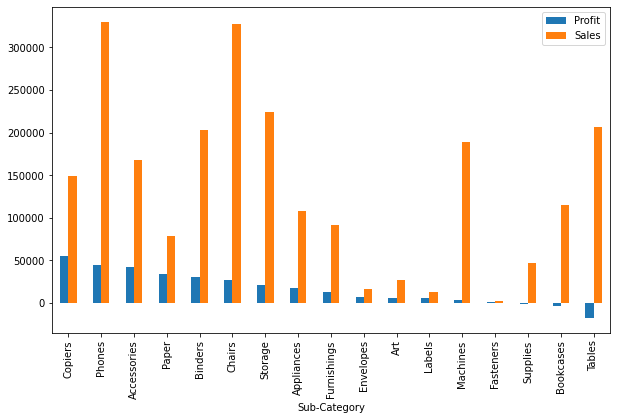

In [15]:
df.groupby('Sub-Category')['Profit','Sales'].sum().sort_values(ascending = False, by = 'Profit').plot(kind = 'bar', figsize = (10, 6))
plt.show()

Phones sub category has the highest sales. While Fastners and Labels shows the lowest.

Copiers sub category has the highest profit. While Tables and Bookcases incurs loss.

####State wise Profits

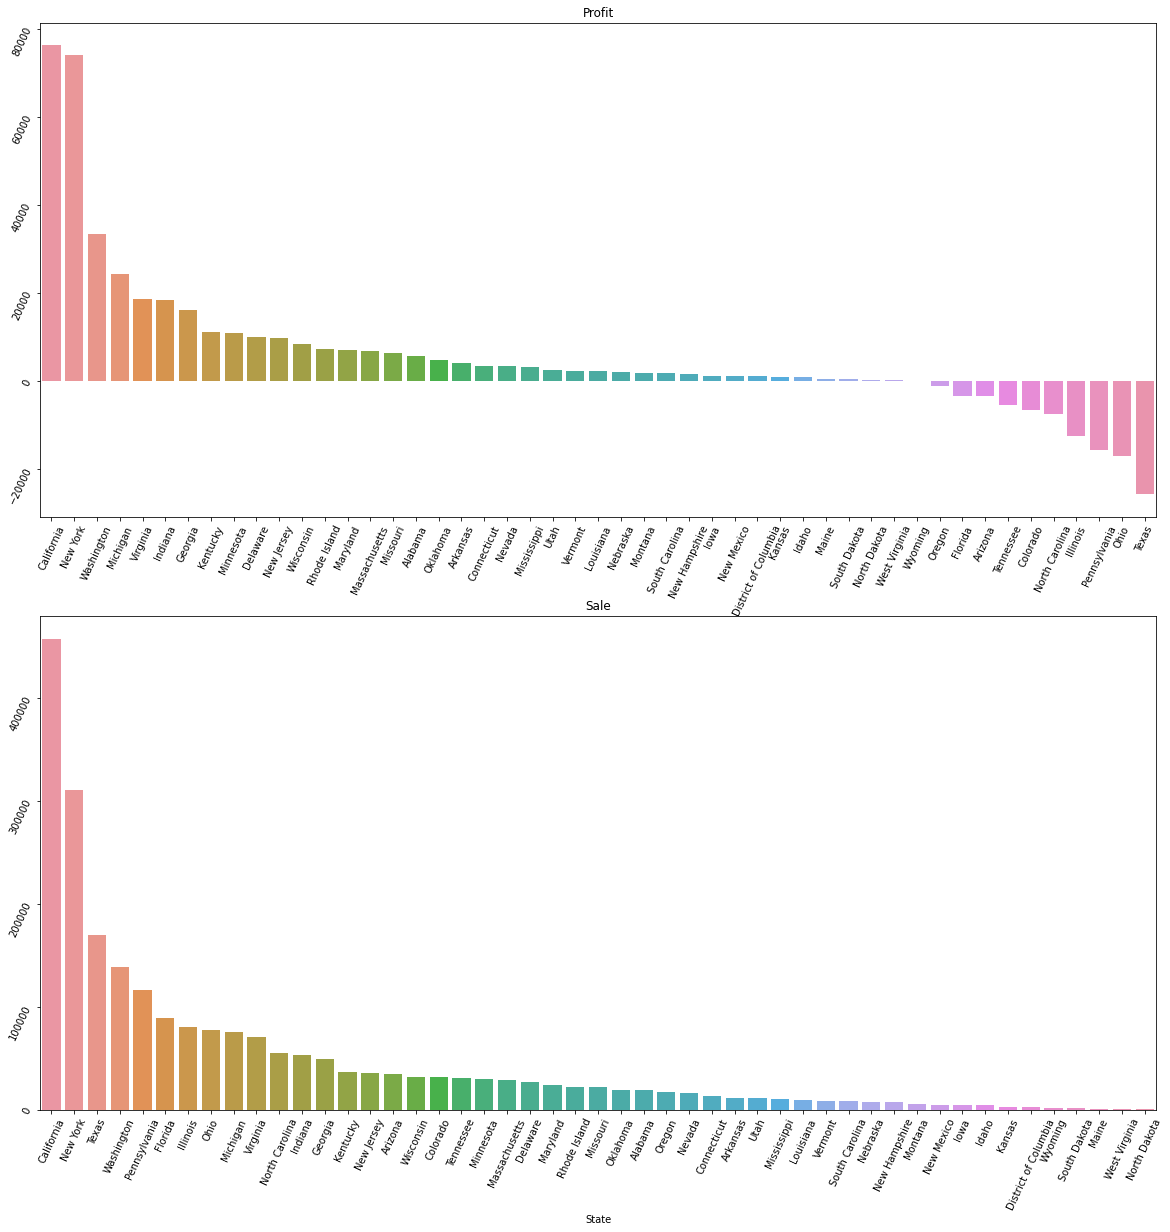

In [16]:
state_profit = df.groupby('State').sum()['Profit'].sort_values(ascending = False)
state_sales = df.groupby('State').sum()['Sales'].sort_values(ascending = False)

_, axes = plt.subplots(2, 1, figsize = (20, 20))
sns.barplot(x = state_profit.index, y = state_profit.values, ax = axes[0])
axes[0].tick_params(labelrotation = 65)
axes[0].set_title("Profit")

sns.barplot(x = state_sales.index, y = state_sales.values, ax = axes[1])
axes[1].tick_params(labelrotation = 65)
axes[1].set_title("Sale")

plt.show()

California State has the highest profit and sales, followed by New York.

Eventhough Texas has third highest sales, it shows the lowest porfits.

North Dakota shows lowest sales.

####City wise Profits & Sales

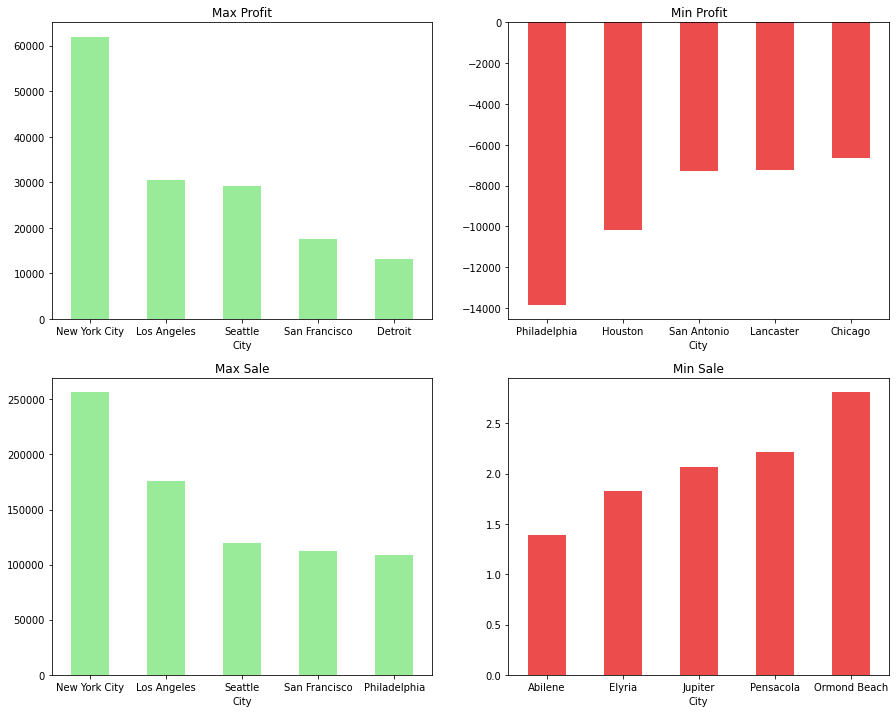

In [17]:
profit_city = df.groupby("City").sum()['Profit']
profit_sales = df.groupby("City").sum()['Sales']

_, axes = plt.subplots(2,2, figsize = (15, 12))
profit_city.sort_values(ascending = False).head().plot(kind ='bar', ax = axes[0,0], color=(0,0.8,0,0.4))
axes[0,0].tick_params(labelrotation = 0)
axes[0,0].set_title("Max Profit")

profit_city.sort_values(ascending = True).head().plot(kind='bar',ax = axes[0,1], color=(0.9,0,0,0.7))
axes[0,1].tick_params(labelrotation = 0)
axes[0,1].set_title("Min Profit")

profit_sales.sort_values(ascending = False).head().plot(kind ='bar', ax = axes[1,0], color=(0,0.8,0,0.4))
axes[1,0].tick_params(labelrotation = 0)
axes[1,0].set_title("Max Sale")

profit_sales.sort_values(ascending = True).head().plot(kind='bar',ax = axes[1,1], color=(0.9,0,0,0.7))
axes[1,1].tick_params(labelrotation = 0)
axes[1,1].set_title("Min Sale")

plt.show()

New York City and Los Angeles has highest profit and sale.

Philadelphia and Houston has lowest profit.

Abilene and Elyria has lowest sales.

####City wise Discounts

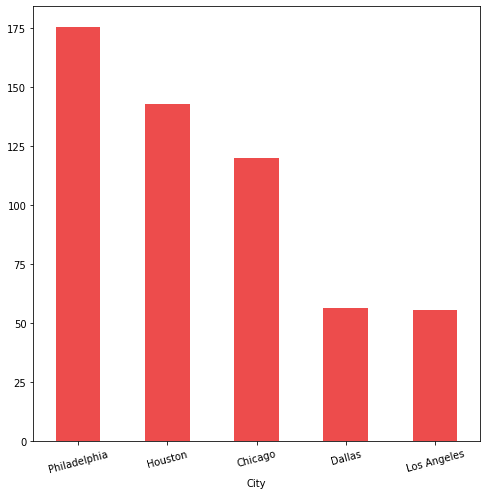

In [18]:
dis_city = df.groupby("City").sum()['Discount'].sort_values(ascending = False)

plt.figure(figsize = (8, 8))
dis_city.head().plot(kind ='bar', color=(0.9,0,0,0.7))
plt.xticks(rotation = 15)
plt.show()

Philadelphia and Houston has given the highest discounts and yet they have the lowest profits as concluded previously. 

This fact should be taken for consideration.

###Conclusion
---
####Highest
Category: Technology (Sales & Profits)

Sub Category: Phones (Sales), Copiers (Profits)

State: California (Sales & Profits)

City: New York City (Sales & Profits)

---

####Lowest
Category: Office Supplies (Sales), Furniture (Profits)

Sub Category: Fastners (Sales), Tables (Profits)

State: North Dakota (Sales), Texas (Profits)

City: Abilene (Sales), Philadelphia (Profits)

---

####Note
- Larger cities incurs higher sales.
- Technology category leads by noticeable margins in both profits and sales.
- Copiers and Machines sub-category leads by noticeable margins in both profits and sales.
- Cities like Philadelphia have highest discount yet yeilds lowest profit.
- Cities like Appleton and Washington having 0 discount also generates higher profit.